In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gps_data = pd.read_csv('./public/data1.csv')
gps_data = gps_data.dropna(axis='rows')



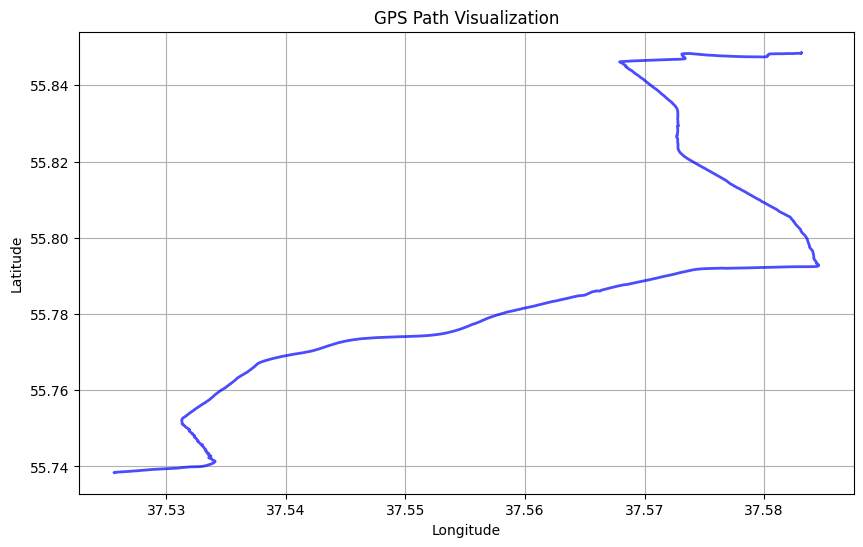

In [31]:
latitude = gps_data[' Latitude'].to_numpy()
longitude = gps_data[' Longitude'].to_numpy()


plt.figure(figsize=(10, 6))
plt.plot(longitude, latitude, color='blue', alpha=0.7, linewidth=2)
plt.title('GPS Path Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
import folium
from matplotlib.colors import LinearSegmentedColormap

gps_data = pd.read_csv('./public/data1.csv')

map_center = [gps_data[' Latitude'].mean(), gps_data[' Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=10)

speedOBDs = gps_data['Speed (OBD)(km/h)']
speedGPSs = gps_data['GPS Speed (Meters/second)']
speeds = speedGPSs
normalized_speeds = (speeds - speeds.min()) / (speeds.max() - speeds.min())

locations = []
for _, row in gps_data.iterrows():
    locations.append([row[' Latitude'], row[' Longitude']])

segments = []
for i in range(len(locations) - 1):
    start = locations[i]
    end = locations[i + 1]
    speed = normalized_speeds[i]
    color = '#%02x%02x%02x' % (int(255 * (1 - speed)), int(255 * speed), 0)
    segments.append({'coordinates': [start, end], 'color': color})

folium.Marker(location=locations[0], popup='Start').add_to(map)
folium.Marker(location=locations[len(locations)-1], popup='Finish').add_to(map)

for segment in segments:
    folium.PolyLine(
        locations=segment['coordinates'],
        color=segment['color'],
        weight=2
    ).add_to(map)

map.save('./public/gps_path_GPSspeed.html')

In [ ]:
import pandas as pd
import folium
import numpy as np
#Неудачная попытка отображения движения на карте!!!
gps_data = pd.read_csv('gps_data.csv')

map_center = [gps_data['Latitude'].mean(), gps_data['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=10)


locations = list(zip(gps_data['Latitude'], gps_data['Longitude']))
bearings = gps_data[' Bearing']  


def get_icon(bearing):
    return folium.Icon(icon='arrow-up', prefix='fa', angle=bearing)


for location, bearing in zip(locations, bearings):
    folium.Marker(location=location, icon=get_icon(bearing)).add_to(map)

map.save('robot_orientation.html')

In [65]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson
from datetime import datetime
#Неудачная попытка отображения движения на карте!!!
def clear_map(map_obj):
    for layer in map_obj._children.values():
        if isinstance(layer, TimestampedGeoJson):
            map_obj.remove_layer(layer)

gps_data = pd.read_csv('./public/data1.csv')


gps_data['Timestamp'] = pd.to_datetime(gps_data['GPS Time'])


gps_data['ISO_Time'] = gps_data['Timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S')


features = []
for index, row in gps_data.iterrows():
    if index % 2 == 0:  
        feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': [row[' Longitude'], row[' Latitude']]
            },
            'properties': {
                'time': row['ISO_Time'],
                'icon': 'marker',
                'iconstyle': {
                    'iconUrl': 'https://icons.veryicon.com/png/o/phone/location3/33-navigation-arrow.png',
                    'iconSize': [25, 41],
                    'iconAnchor': [12, 41],
                    'popupAnchor': [1, -34],
                    'className': 'dot',
                    'html': f'<img src="https://icons.veryicon.com/png/o/phone/location3/33-navigation-arrow.png" style="width: 25px; height: 41px; transform: rotate({round(row[" Bearing"])}deg);">'
                }
            }
        }
        features.append(feature)


geojson = {
    'type': 'FeatureCollection',
    'features': features
}


map_center = [gps_data[' Latitude'].mean(), gps_data[' Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=10)

clear_map(map)


tgj = TimestampedGeoJson(geojson, period='PT1S', duration='PT15M', add_last_point=False, auto_play=True)
tgj.add_to(map)


map.save('./public/robot_rotation.html')

C:\Users\User\AppData\Local\Temp\ipykernel_30556\3532272096.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gps_data['Timestamp'] = pd.to_datetime(gps_data['GPS Time'])


Шаг 1: Оценка модуля скорости = 0.08333333333333337
Шаг 2: Оценка модуля скорости = 0.34285714285714286
Шаг 3: Оценка модуля скорости = 0.3763440860215054
Шаг 4: Оценка модуля скорости = 0.3811475409836066
Шаг 5: Оценка модуля скорости = 0.3818466353677621
Шаг 6: Оценка модуля скорости = 0.38194859533771663
Шаг 7: Оценка модуля скорости = 0.38196347031963473
Шаг 8: Оценка модуля скорости = 0.3819656405337053
Шаг 9: Оценка модуля скорости = 0.38196595716331905
Шаг 10: Оценка модуля скорости = 0.3819660033589495
Шаг 11: Оценка модуля скорости = 0.38196601009880105
Шаг 12: Оценка модуля скорости = 0.38196601108213224
Шаг 13: Оценка модуля скорости = 0.38196601122559826
Шаг 14: Оценка модуля скорости = 0.3819660112465296
Шаг 15: Оценка модуля скорости = 0.3819660112495835
Шаг 16: Оценка модуля скорости = 0.38196601125002905
Шаг 17: Оценка модуля скорости = 0.3819660112500941
Шаг 18: Оценка модуля скорости = 0.38196601125010343
Шаг 19: Оценка модуля скорости = 0.3819660112501049
Шаг 20: Оце

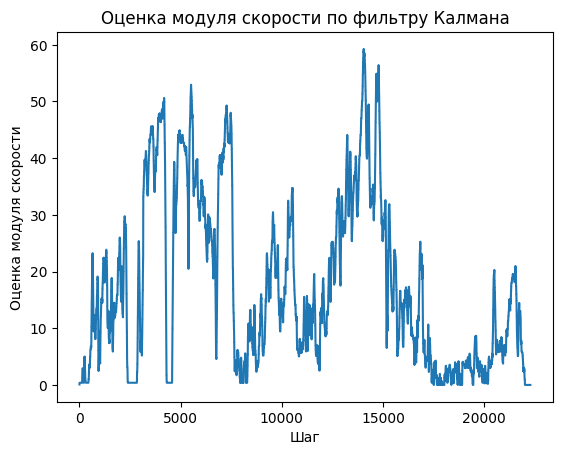

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./public/data1.csv')

data['GPS Time'] = pd.to_datetime(data['GPS Time'])

sensor1 = data['Speed (OBD)(km/h)', (data['GPS Time'].dt.hour != 17) | 
                     ((data['GPS Time'].dt.hour == 17) & (data['GPS Time'].dt.minute < 25)) | 
                     ((data['GPS Time'].dt.hour == 17) & (data['GPS Time'].dt.minute >= 35))]
sensor2 = data['Speed (OBD)(km/h)']

X_k_list = []

X_k_prev = 0  # Инициализация оценки модуля скорости
P_k_prev = 1  # Инициализация ошибки оценки
Q = 0.1  # Ковариация процесса
R = 0.1  # Ковариация измерений
dt = 1  # Шаг времени

for i in range(len(sensor1)):
    # Предсказание
    X_pred = X_k_prev + dt * sensor1[i] - dt * X_k_prev
    P_pred = P_k_prev + Q

    # Обновление
    K = P_pred / (P_pred + R)
    X_k = X_pred + K * (sensor2[i] - X_pred)
    P_k = (1 - K) * P_pred

    X_k_list.append(X_k)

    X_k_prev = X_k
    P_k_prev = P_k

    print(f'Шаг {i + 1}: Оценка модуля скорости = {X_k}')

plt.plot(range(len(sensor1)), X_k_list)
plt.xlabel('Шаг')
plt.ylabel('Оценка модуля скорости')
plt.title('Оценка модуля скорости по фильтру Калмана')
plt.show()

Шаг 1: Оценка модуля скорости = 0.08333333333333337
Шаг 2: Оценка модуля скорости = 0.34285714285714286
Шаг 3: Оценка модуля скорости = 0.3763440860215054
Шаг 4: Оценка модуля скорости = 0.3811475409836066
Шаг 5: Оценка модуля скорости = 0.3818466353677621
Шаг 6: Оценка модуля скорости = 0.38194859533771663
Шаг 7: Оценка модуля скорости = 0.38196347031963473
Шаг 8: Оценка модуля скорости = 0.3819656405337053
Шаг 9: Оценка модуля скорости = 0.38196595716331905
Шаг 10: Оценка модуля скорости = 0.3819660033589495
Шаг 11: Оценка модуля скорости = 0.38196601009880105
Шаг 12: Оценка модуля скорости = 0.38196601108213224
Шаг 13: Оценка модуля скорости = 0.38196601122559826
Шаг 14: Оценка модуля скорости = 0.3819660112465296
Шаг 15: Оценка модуля скорости = 0.3819660112495835
Шаг 16: Оценка модуля скорости = 0.38196601125002905
Шаг 17: Оценка модуля скорости = 0.3819660112500941
Шаг 18: Оценка модуля скорости = 0.38196601125010343
Шаг 19: Оценка модуля скорости = 0.3819660112501049
Шаг 20: Оце

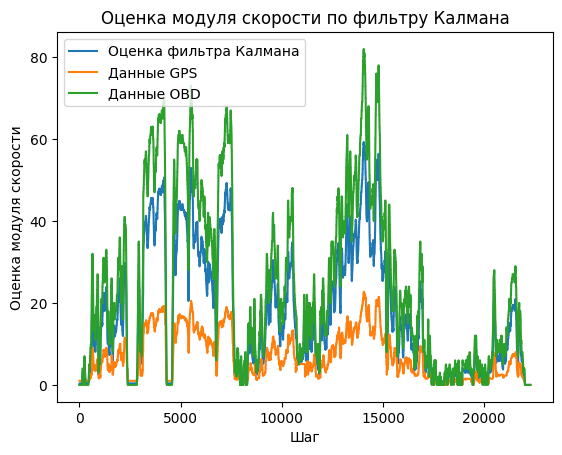

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./public/data1.csv')
sensor1 = data['GPS Speed (Meters/second)']
sensor2 = data['Speed (OBD)(km/h)']

time_mask = (data['GPS Time'] < '17:25:00') | (data['GPS Time'] > '17:35:00')

sensor1_filtered = sensor1[time_mask]

X_k_list = []

X_k_prev = 0  # Инициализация оценки модуля скорости
P_k_prev = 1  # Инициализация ошибки оценки
Q = 0.1  # Ковариация процесса
R = 0.1  # Ковариация измерений
dt = 1  # Шаг времени

for i in range(len(sensor1_filtered)):
    # Предсказание
    X_pred = X_k_prev + dt * sensor1_filtered[i] - dt * X_k_prev
    P_pred = P_k_prev + Q

    # Обновление
    K = P_pred / (P_pred + R)
    X_k = X_pred + K * (sensor2[i] - X_pred)
    P_k = (1 - K) * P_pred

    X_k_list.append(X_k)

    # Обновляем переменные для следующего шага
    X_k_prev = X_k
    P_k_prev = P_k

    print(f'Шаг {i + 1}: Оценка модуля скорости = {X_k}')

plt.plot(range(len(sensor1_filtered)), X_k_list, label='Оценка фильтра Калмана')
plt.plot(range(len(sensor1_filtered)), sensor1_filtered, label='Данные GPS')
plt.plot(range(len(sensor2)), sensor2, label='Данные OBD')
plt.xlabel('Шаг')
plt.ylabel('Оценка модуля скорости')
plt.title('Оценка модуля скорости по фильтру Калмана')
plt.legend()  # Отображение легенды
plt.show()
    

C:\Users\User\AppData\Local\Temp\ipykernel_21200\367092641.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GPS Time'] = pd.to_datetime(data['GPS Time'])


Шаг 1: Оценка модуля скорости = 0.08333333333333337
Шаг 2: Оценка модуля скорости = 0.34285714285714286
Шаг 3: Оценка модуля скорости = 0.3763440860215054
Шаг 4: Оценка модуля скорости = 0.3811475409836066
Шаг 5: Оценка модуля скорости = 0.3818466353677621
Шаг 6: Оценка модуля скорости = 0.38194859533771663
Шаг 7: Оценка модуля скорости = 0.38196347031963473
Шаг 8: Оценка модуля скорости = 0.3819656405337053
Шаг 9: Оценка модуля скорости = 0.38196595716331905
Шаг 10: Оценка модуля скорости = 0.3819660033589495
Шаг 11: Оценка модуля скорости = 0.38196601009880105
Шаг 12: Оценка модуля скорости = 0.38196601108213224
Шаг 13: Оценка модуля скорости = 0.38196601122559826
Шаг 14: Оценка модуля скорости = 0.3819660112465296
Шаг 15: Оценка модуля скорости = 0.3819660112495835
Шаг 16: Оценка модуля скорости = 0.38196601125002905
Шаг 17: Оценка модуля скорости = 0.3819660112500941
Шаг 18: Оценка модуля скорости = 0.38196601125010343
Шаг 19: Оценка модуля скорости = 0.3819660112501049
Шаг 20: Оце

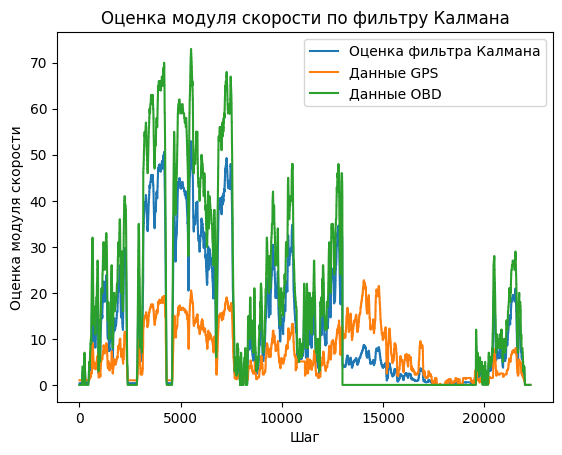

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./public/data1.csv')
data['GPS Time'] = pd.to_datetime(data['GPS Time'])
data.loc[(data['GPS Time'].dt.hour == 17) & (data['GPS Time'].dt.minute >= 40) & (data['GPS Time'].dt.minute <= 50), 'Speed (OBD)(km/h)'] = 0
sensor1 = data['GPS Speed (Meters/second)']
sensor2 = data['Speed (OBD)(km/h)']


X_k_list = []

X_k_prev = 0  # Инициализация оценки модуля скорости
P_k_prev = 1  # Инициализация ошибки оценки
Q = 0.1  # Ковариация процесса
R = 0.1  # Ковариация измерений
dt = 1  # Шаг времени

for i in range(len(sensor1)):
    # Предсказание
    X_pred = X_k_prev + dt * sensor1[i] - dt * X_k_prev
    P_pred = P_k_prev + Q

    # Обновление
    K = P_pred / (P_pred + R)
    X_k = X_pred + K * (sensor2[i] - X_pred)
    P_k = (1 - K) * P_pred

    X_k_list.append(X_k)

    # Обновляем переменные для следующего шага
    X_k_prev = X_k
    P_k_prev = P_k

    print(f'Шаг {i + 1}: Оценка модуля скорости = {X_k}')

plt.plot(range(len(sensor1)), X_k_list, label='Оценка фильтра Калмана')
plt.plot(range(len(sensor1)), sensor1, label='Данные GPS')
plt.plot(range(len(sensor2)), sensor2, label='Данные OBD')
plt.xlabel('Шаг')
plt.ylabel('Оценка модуля скорости')
plt.title('Оценка модуля скорости по фильтру Калмана')
plt.legend()  # Отображение легенды
plt.show()
    

C:\Users\User\AppData\Local\Temp\ipykernel_21200\294459770.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GPS Time'] = pd.to_datetime(data['GPS Time'])


Шаг 1: Оценка модуля скорости = 0.08333333333333337
Шаг 2: Оценка модуля скорости = 0.34285714285714286
Шаг 3: Оценка модуля скорости = 0.3763440860215054
Шаг 4: Оценка модуля скорости = 0.3811475409836066
Шаг 5: Оценка модуля скорости = 0.3818466353677621
Шаг 6: Оценка модуля скорости = 0.38194859533771663
Шаг 7: Оценка модуля скорости = 0.38196347031963473
Шаг 8: Оценка модуля скорости = 0.3819656405337053
Шаг 9: Оценка модуля скорости = 0.38196595716331905
Шаг 10: Оценка модуля скорости = 0.3819660033589495
Шаг 11: Оценка модуля скорости = 0.38196601009880105
Шаг 12: Оценка модуля скорости = 0.38196601108213224
Шаг 13: Оценка модуля скорости = 0.38196601122559826
Шаг 14: Оценка модуля скорости = 0.3819660112465296
Шаг 15: Оценка модуля скорости = 0.3819660112495835
Шаг 16: Оценка модуля скорости = 0.38196601125002905
Шаг 17: Оценка модуля скорости = 0.3819660112500941
Шаг 18: Оценка модуля скорости = 0.38196601125010343
Шаг 19: Оценка модуля скорости = 0.3819660112501049
Шаг 20: Оце

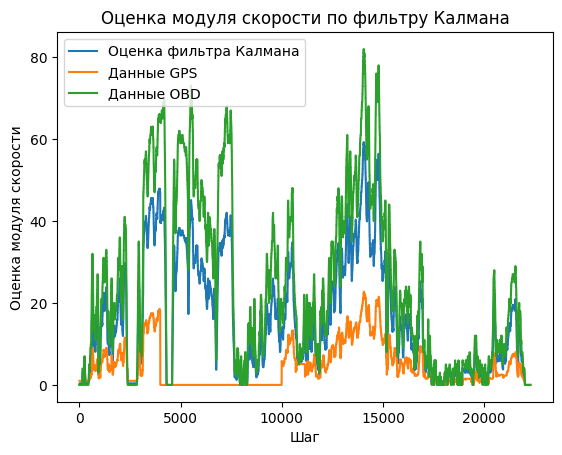

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./public/data1.csv')
data['GPS Time'] = pd.to_datetime(data['GPS Time'])
data.loc[(data['GPS Time'].dt.hour == 17) & (data['GPS Time'].dt.minute >= 25) & (data['GPS Time'].dt.minute <= 34), 'GPS Speed (Meters/second)'] = 0
sensor1 = data['GPS Speed (Meters/second)']
sensor2 = data['Speed (OBD)(km/h)']


X_k_list = []

X_k_prev = 0  # Инициализация оценки модуля скорости
P_k_prev = 1  # Инициализация ошибки оценки
Q = 0.1  # Ковариация процесса
R = 0.1  # Ковариация измерений
dt = 1  # Шаг времени

for i in range(len(sensor1)):
    # Предсказание
    X_pred = X_k_prev + dt * sensor1[i] - dt * X_k_prev
    P_pred = P_k_prev + Q

    # Обновление
    K = P_pred / (P_pred + R)
    X_k = X_pred + K * (sensor2[i] - X_pred)
    P_k = (1 - K) * P_pred

    X_k_list.append(X_k)

    # Обновляем переменные для следующего шага
    X_k_prev = X_k
    P_k_prev = P_k

    print(f'Шаг {i + 1}: Оценка модуля скорости = {X_k}')

plt.plot(range(len(sensor1)), X_k_list, label='Оценка фильтра Калмана')
plt.plot(range(len(sensor1)), sensor1, label='Данные GPS')
plt.plot(range(len(sensor2)), sensor2, label='Данные OBD')
plt.xlabel('Шаг')
plt.ylabel('Оценка модуля скорости')
plt.title('Оценка модуля скорости по фильтру Калмана')
plt.legend()  # Отображение легенды
plt.show()

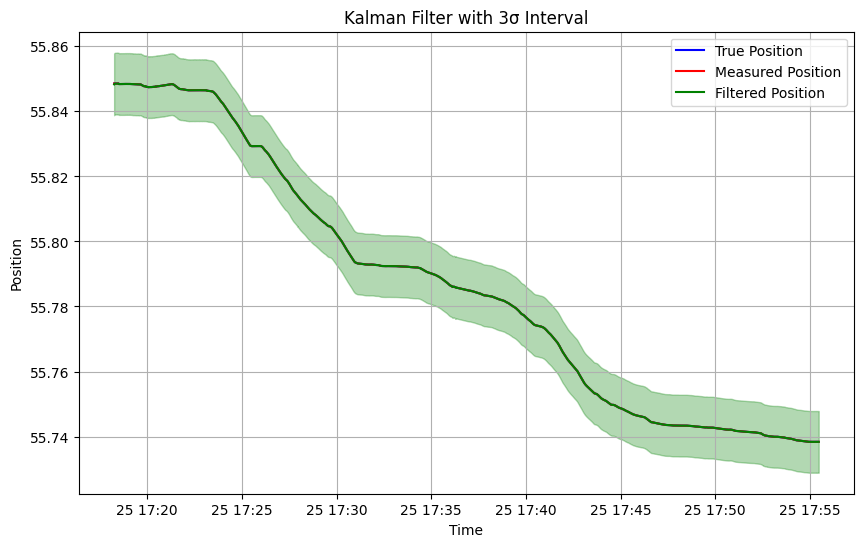

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from numpy.linalg import inv

# Функция фильтра Калмана
def kalman_filter(z, F, H, Q, R, x0, P0):
    n = len(x0)
    m = len(z)
    x = np.zeros((n, m))
    P = np.zeros((n, n, m))
    x_pred = x0
    P_pred = P0
    
    for i in range(m):
        # Предсказание
        x_pred = F @ x_pred
        P_pred = F @ P_pred @ F.T + Q
        
        # Обновление
        K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)
        x[:, i] = x_pred + K @ (z[i] - H @ x_pred)
        P[:, :, i] = (np.eye(n) - K @ H) @ P_pred
    
    return x, P

# Загрузка данных из файла
data = pd.read_csv('./public/data1.csv')
data = data[data.index % 10 == 0].reset_index()

# Преобразование данных времени в формат datetime
t = pd.to_datetime(data['GPS Time'], format='%a %b %d %H:%M:%S GMT%z %Y')
v = data['GPS Speed (Meters/second)']
x_true = data[' Latitude']

# Параметры фильтра Калмана
dt = 1  # Переводим разницу в секунды
F = np.array([[1, dt], [0, 1]])
H = np.array([[1, 0]])  # Матрица наблюдений
Q = block_diag(0.1, 0.01)  # Ковариационная матрица процесса
R = 0.00001  # Ковариационная матрица наблюдений
x0 = np.array([0, 0])  # Начальное состояние
P0 = np.eye(2)  # Начальная ковариационная матрица


z = x_true 
x_filtered, P = kalman_filter(z, F, H, Q, R, x0, P0)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t, x_true, label='True Position', color='b')
plt.plot(t, z, label='Measured Position', color='r')
plt.plot(t, x_filtered[0], label='Filtered Position', color='g')
plt.fill_between(t, x_filtered[0] - 3 * np.sqrt(P[0, 0, :]), x_filtered[0] + 3 * np.sqrt(P[0, 0, :]), color='g', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Kalman Filter with 3σ Interval')
plt.legend()
plt.grid(True)
plt.show()